# Aashia Mehta
# CS 7641: Machine Learning
# Project 4: Markov Decision Processes

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import hiive.mdptoolbox.example as example
import hiive.mdptoolbox.mdp as mdp
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map

# Sources:
# https://github.com/hiive/hiivemdptoolbox/blob/master/hiive/mdptoolbox/example.py
# https://github.com/hiive/hiivemdptoolbox
# https://pymdptoolbox.readthedocs.io/en/latest/api/mdp.html

In [5]:
def plot_reward_iterations(run_stats, title, size, label):
    iterations = [stat['Iteration'] for stat in run_stats]
    rewards = [stat['Reward'] for stat in run_stats]
    plt.title("Reward vs. Iteration \n(Frozen Lake, " + title + ", " + size + ")")
    plt.xlabel("Iterations")
    plt.ylabel("Reward")
    plt.plot(iterations, rewards, label=label)
    plt.legend(loc='best')

In [ ]:
def plot_time_iterations(run_stats, title, size, label):
    iterations = [stat['Iteration'] for stat in run_stats]
    rewards = [stat['Reward'] for stat in run_stats]
    plt.title("Reward vs. Iteration \n(Frozen Lake, " + title + ", " + size + ")")
    plt.xlabel("Iterations")
    plt.ylabel("Reward")
    plt.plot(iterations, rewards, label=label)
    plt.legend(loc='best')

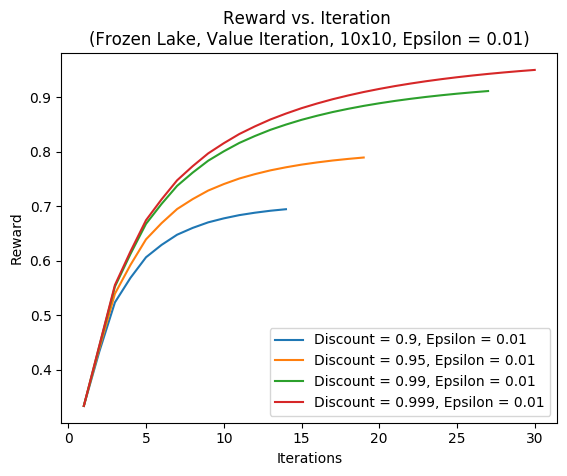

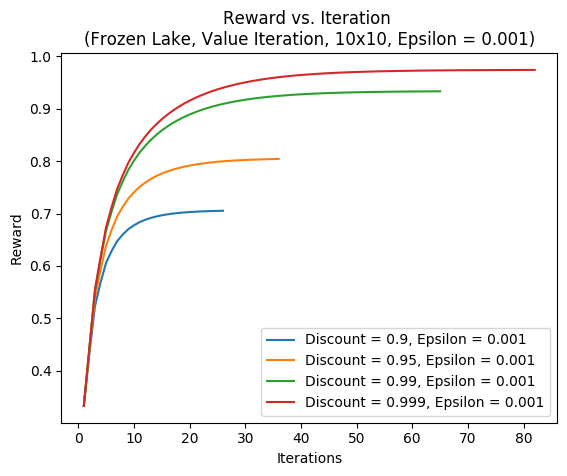

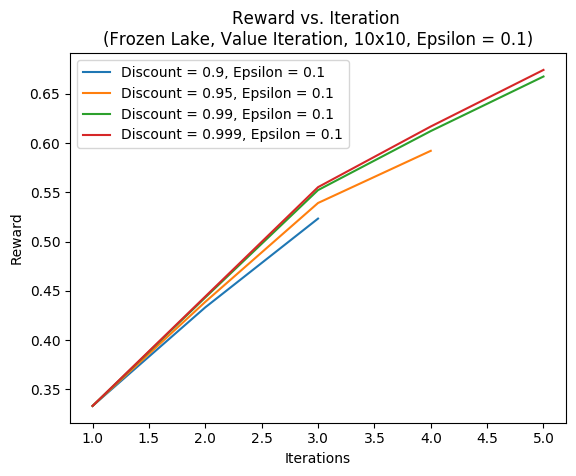

In [14]:
np.random.seed(0)

random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.01)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Value Iteration", "10x10, Epsilon = 0.01", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.01))
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Value Iteration", "10x10, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.001))
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.1)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Value Iteration", "10x10, Epsilon = 0.1", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.1))
plt.show()
plt.close()

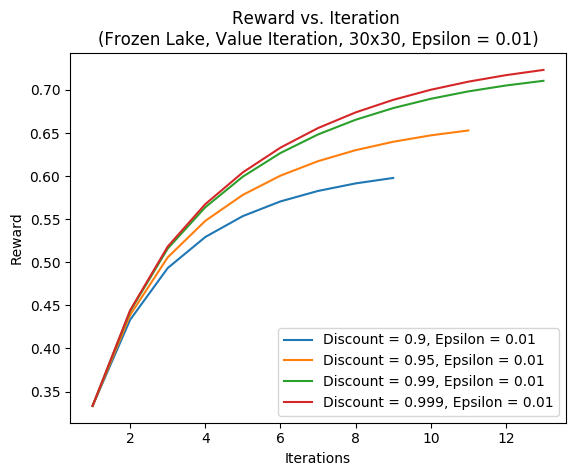

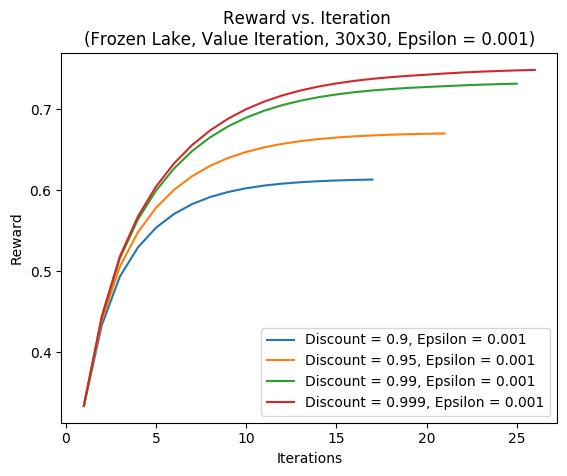

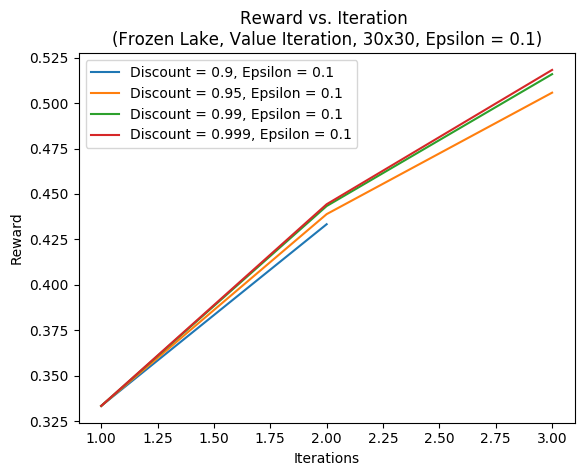

In [26]:
np.random.seed(0)

random_map = generate_random_map(size=30)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.01)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Value Iteration", "30x30, Epsilon = 0.01", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.01))
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Value Iteration", "30x30, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.001))
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.1)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Value Iteration", "30x30, Epsilon = 0.1", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.1))
plt.show()
plt.close()

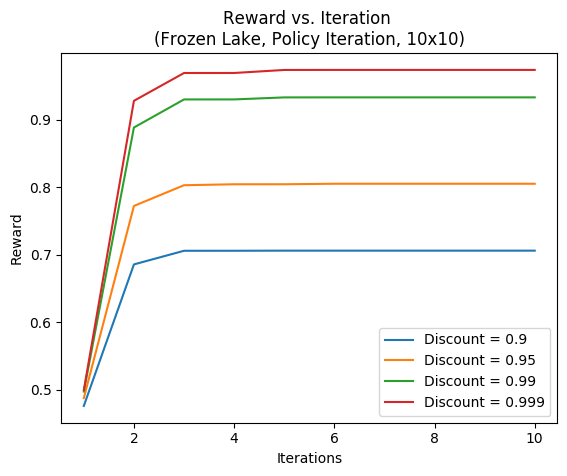

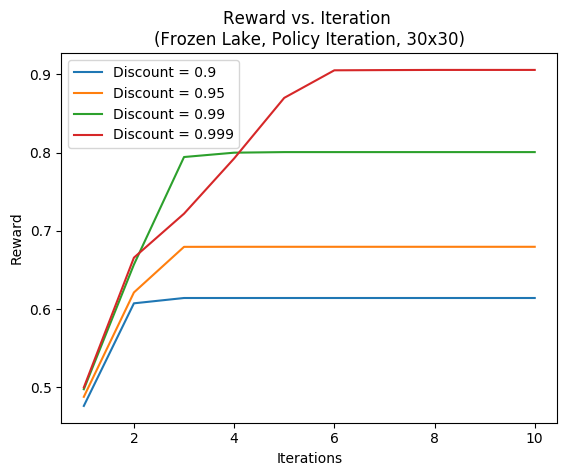

In [27]:
np.random.seed(0)

random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], max_iter=10)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_reward_iterations(pi_run_stats, "Policy Iteration", "10x10", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

random_map = generate_random_map(size=30)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], max_iter=10)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_reward_iterations(pi_run_stats, "Policy Iteration", "30x30", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

[{'State': None, 'Action': None, 'Reward': 0.4761904761904762, 'Error': 0.14285714285714288, 'Time': 0.007797718048095703, 'V[0]': 0.0, 'Max V': 0.4761904761904762, 'Mean V': 0.013870670129429807, 'Iteration': 1}, {'State': None, 'Action': None, 'Reward': 0.6859249545499274, 'Error': 0.09129610865706717, 'Time': 0.012071847915649414, 'V[0]': 0.0, 'Max V': 0.6859249545499274, 'Mean V': 0.03980949081314693, 'Iteration': 2}, {'State': None, 'Action': None, 'Reward': 0.7061414631500492, 'Error': 0.037603114713681024, 'Time': 0.01495671272277832, 'V[0]': 0.0, 'Max V': 0.7061414631500492, 'Mean V': 0.058743967710310006, 'Iteration': 3}, {'State': None, 'Action': None, 'Reward': 0.7061603319888629, 'Error': 0.007743753702818969, 'Time': 0.015660762786865234, 'V[0]': -1.536696763034847e-21, 'Max V': 0.7061603319888629, 'Mean V': 0.06288094042766962, 'Iteration': 4}, {'State': None, 'Action': None, 'Reward': 0.7063266771177078, 'Error': 0.0005397168187972093, 'Time': 0.019835948944091797, 'V[0]

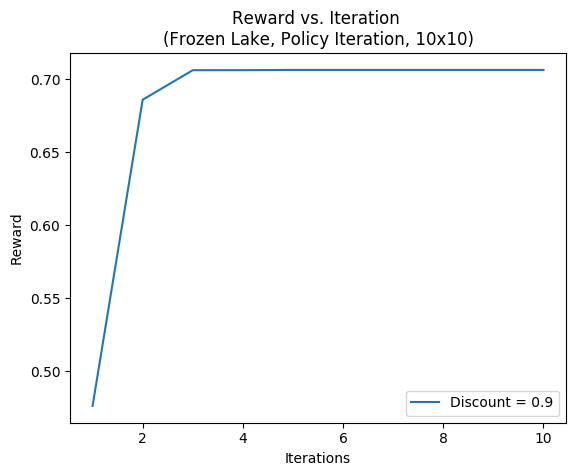

In [28]:
np.random.seed(0)

random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], max_iter=10)
    pi.run()
    pi_run_stats = pi.run_stats
    print(pi_run_stats)
    plot_reward_iterations(pi_run_stats, "Policy Iteration", "10x10", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

# random_map = generate_random_map(size=30)
# P, R = example.openai("FrozenLake-v1", desc=random_map)

# discounts = [0.9, 0.95, 0.99, 0.999]
# for i in range(len(discounts)):
#     pi = mdp.PolicyIteration(P, R, discounts[i], max_iter=10)
#     pi.run()
#     pi_run_stats = pi.run_stats
#     plot_reward_iterations(pi_run_stats, "Policy Iteration", "30x30", 
#                            "Discount = " + str(discounts[i]))
# plt.show()
# plt.close()

[{'State': None, 'Action': None, 'Reward': 4.0, 'Error': 4.0, 'Time': 5.793571472167969e-05, 'Max V': 4.0, 'Mean V': 1.6666666666666667, 'Iteration': 1}, {'State': None, 'Action': None, 'Reward': 7.24, 'Error': 3.24, 'Time': 0.00017118453979492188, 'Max V': 7.24, 'Mean V': 3.7633333333333336, 'Iteration': 2}, {'State': None, 'Action': None, 'Reward': 9.9373, 'Error': 2.6973000000000003, 'Time': 0.0005221366882324219, 'Max V': 9.9373, 'Mean V': 6.190633333333333, 'Iteration': 3}, {'State': None, 'Action': None, 'Reward': 12.291970000000001, 'Error': 2.3546700000000005, 'Time': 0.0006051063537597656, 'Max V': 12.291970000000001, 'Mean V': 8.545303333333335, 'Iteration': 4}, {'State': None, 'Action': None, 'Reward': 14.411173000000003, 'Error': 2.1192030000000024, 'Time': 0.0006458759307861328, 'Max V': 14.411173000000003, 'Mean V': 10.664506333333335, 'Iteration': 5}, {'State': None, 'Action': None, 'Reward': 16.3184557, 'Error': 1.9072827000000014, 'Time': 0.0007171630859375, 'Max V': 1

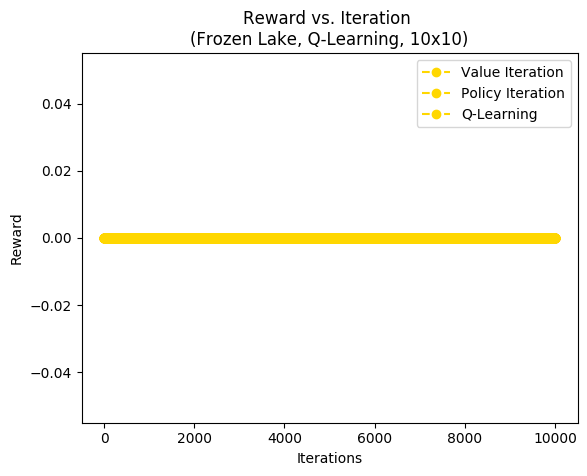

In [48]:
# FOREST
P, R = example.forest()
vi = mdp.ValueIteration(P, R, 0.9)
vi.run()
vi_run_stats = vi.run_stats
print(vi_run_stats)
plot_reward_iterations(vi_run_stats, "Value Iteration", "10x10")

pi = mdp.PolicyIteration(P, R, 0.9)
pi.run()
pi_run_stats = pi.run_stats
plot_reward_iterations(pi_run_stats, "Policy Iteration", "10x10")

ql = mdp.QLearning(P, R, 0.9)
ql.run()
ql_run_stats = ql.run_stats
plot_reward_iterations(ql_run_stats, "Q-Learning", "10x10")

# P, R = example.forest(S=10000)
# vi = mdp.ValueIteration(P, R, 0.9)
# vi.run()
# print(vi.iter, vi.time)
# # print(vi.run_stats)

# pi = mdp.PolicyIteration(P, R, 0.9)
# pi.run()
# print(pi.iter, pi.time)

# ql = mdp.QLearning(P, R, 0.9)
# ql.run()
# print(ql.time)

# Thursday:
# MAKE PLOTS FOR
# Reward vs. Iteration
# Convergence Delta vs. Iteration
# Reward vs. Time

# create a small state space and a large state space for ecah
